<a href="https://colab.research.google.com/github/logithkannan/FAKE-NEWS/blob/main/FAKE_NEWS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving fake_or_real_news.csv to fake_or_real_news.csv
Sample Data:
       id                                              title  \
0   8476                       You Can Smell Hillary’s Fear   
1  10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2   3608        Kerry to go to Paris in gesture of sympathy   
3  10142  Bernie supporters on Twitter erupt in anger ag...   
4    875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  

Label Distribution:
 label
REAL    3171
FAKE    3164
Name: count, dtype: int64

Accuracy: 0.9155485398579322

Classification Report:
               precision    recall  f1-score   suppor

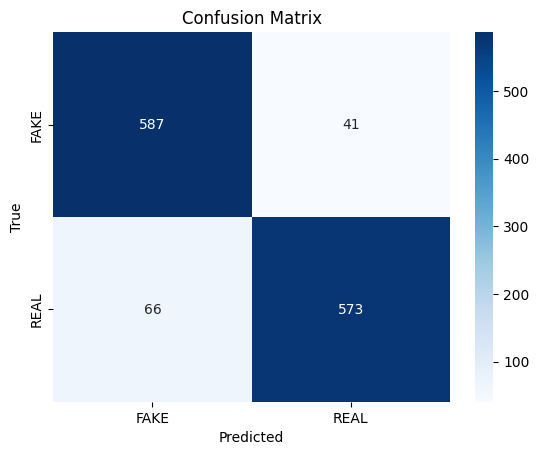


Prediction Example:
News: The president has announced a new policy to tackle climate change.
Prediction: REAL


In [ ]:
# Step 1: Install and import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Optional: Upload CSV from local
from google.colab import files
uploaded = files.upload()

# Step 2: Load the dataset
# Replace 'filename.csv' with your actual filename
df = pd.read_csv('fake_or_real_news.csv')

# Step 3: Inspect the data
print("Sample Data:\n", df.head())
print("\nLabel Distribution:\n", df['label'].value_counts())

# Step 4: Preprocess
df = df[['text', 'label']].dropna()

# Encode labels: FAKE -> 0, REAL -> 1
df['label'] = df['label'].map({'FAKE': 0, 'REAL': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Step 5: Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 6: Train the Model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Step 7: Evaluate the Model
y_pred = model.predict(X_test_vec)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Try on Custom Input
def predict_news(news_text):
    vec = vectorizer.transform([news_text])
    pred = model.predict(vec)[0]
    return "REAL" if pred == 1 else "FAKE"

# Test
print("\nPrediction Example:")
sample_text = "The president has announced a new policy to tackle climate change."
print("News:", sample_text)
print("Prediction:", predict_news(sample_text))
